# Dataset Description
*heart_disease_train_dataset.csv* contains 300 training samples, consisting of 13 features and 1 target label. The first row is the header row containing the column names, for a total of 301 rows and 14 columns.

Below is the list of column names, their possible values, and the information that they represent:

Column Name                            | Variable Type | Remarks
---------------------------------------|---------------|--------
age                                    | Integer       | double-digit integer
gender                                 | Binary        | 0 = female ; 1 = male
chest_pain_type                        | Categorical   | 0 = asymptomatic ; 1 = non-anginal pain ; 2 = atypical angina ; 3 = typical angina
resting_blood_pressure                 | Numerical     | mmHg
serum_cholesterol                      | Numerical     | mg/dl
diabetes                               | Binary        | 0 = no ; 1 = yes
left_ventricular_hypertrophy           | Binary        | 0 = no ; 1 = yes
maximum_heart_rate                     | Numerical     | maximum heart rate in beats-per-minute achieved during exercise test
exercise_induced_angina                | Binary        | 0 = no ; 1 = yes
exercise_induced_ST_depression         | Numerical     | relative to ST segment during rest as measured by electrocardiogram
ST_slope_anomaly                       | Binary        | 0 = no ; 1 = yes
number_of_major_blood_vessel_blockages | Integer       | single-digit integer, potential heart blockages as detected by flouroscopy
myocardial_defect                      | Binary        | 0 = no ; 1 = yes
heart_disease                          | Binary        | 0 = no ; 1 = yes

\
*heart_disease_test_dataset.csv* contains 300 test samples, consisting of the same 13 features and 1 target label. The first row is also the header row containing the column names, for a total of 301 rows and 14 columns.


# Setup

In [3]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/My Drive/knn_classifier"
#%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/knn_classifier


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#Standardize Dataset
*standardize_dataset(input_array)* to standardize the values stored in *input_array* with the following formula:

$X_{new} = \frac{X - mean}{standard\_deviation}$


In [9]:
def standardize_dataset(input_array):
  input_array=(input_array-np.mean(input_array,axis=0))/np.std(input_array,axis=0,ddof=1)
  return input_array

#K-Nearest Neighbors Classifier

These are the class attributes of *KNNClassifer*. They can be accessed within all of the functions defined inside *KNNClassifer*: \
*self.k*: The value of *K* for *K-Nearest Neighbors Classifier*. \
*self.X_train*: The rows and feature columns of the train dataset with shape (*num_train_rows*, *num_feature_columns*). \
*self.y_train*: The rows and label column of the train dataset with shape (*num_train_rows*, ). \


##Calculate Euclidean Distance

*calculate_euclidean_distance(self, X_test)* returns a Numpy 2D array with shape (*num_rows_test*, *num_rows_train*), containing the Euclidean Distance between each test dataset row in *X_test* across every train dataset row in *self.X_train*.

$distance(\mathbf{x^{train}}, \mathbf{x^{test}}) = \sqrt{\sum_{i=1}^{n}(x_{i}^{train} - x_{i}^{test})^2}$


##Find K-Nearest Neighbor Labels

*find_k_nearest_neighbor_labels(self, X_test)* returns a Numpy 2D array with shape (*num_rows_test*, *self.k*), containing the labels of the *K-Nearest Neighbors* of *X_test*.

##Predict Label

The function *predict(self, X_test)* returns the predicted labels (integer value of either 0 or 1) of *X_test* as a Numpy 1D array of shape (*num_rows_test*, ). Here, it is being assumed that ties will never occur.

In [10]:
from numpy.lib.function_base import diff
class KNNClassifier:
  def __init__(self, k):
    self.k = k

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def calculate_euclidean_distance(self, X_test):
    #dist=np.zeros((len(X_test),len(self.X_train)))
    #for i in range(len(X_test)):
      #for j in range(len(self.X_train)):
        #sum=0
        #for k in range(X_test.shape[1]):
          #sum=sum+(X_test[i][k]-self.X_train[j][k])**2
        #dist[i][j]=sum**0.5
    #squares=np.square(np.repeat(np.expand_dims(X_test,axis=0),X_test.shape[1],axis=0)-np.repeat(np.expand_dims(self.X_train,axis=1),X_train.shape[0],axis=1))
    #squares=np.square(X_test[np.newaxis,:,:]-self.X_train[:,np.newaxis,:])
    #print("expanded test shape ",np.shape(np.expand_dims(X_test,axis=0)))
    #print("expanded train shape ", np.shape(np.expand_dims(self.X_train,axis=1)))

    #dist=np.sqrt(np.sum(squares,axis=1))
    #diff=X_test[np.newaxis,:,:]-self.X_train[:,newaxis,:]
    #dist=np.sqrt(np.sum(np.square(diff),axis=2))
    dist=np.sqrt(np.sum(np.square(X_test[np.newaxis,:,:]-self.X_train[:,np.newaxis,:]).T,axis=0))
    #sum=np.sum(np.square(diff),axis=2)
    #dist=np.sqrt(sum)
    return dist

  def find_k_nearest_neighbor_labels(self, X_test):
    dist=self.calculate_euclidean_distance(X_test)
    a=np.argsort(dist,axis=1)
    ans=np.take(self.y_train,indices=a[:,:self.k],mode="wrap")
    return ans

  def predict(self, X_test):
    knnlabels=self.find_k_nearest_neighbor_labels(X_test)
    count_of_1=np.count_nonzero(knnlabels,axis=1)
    ans=np.where((count_of_1>(self.k/2)),1,0)
    return ans

#Scoring Metrics

##Confusion Matrix

A confusion matrix is a table that summarizes the predictions and actual labels of a binary classification. The figure below displays the names and definitions of all four prediction-vs-actual cases: True Positive, True Negative, False Positive, and False Negative.

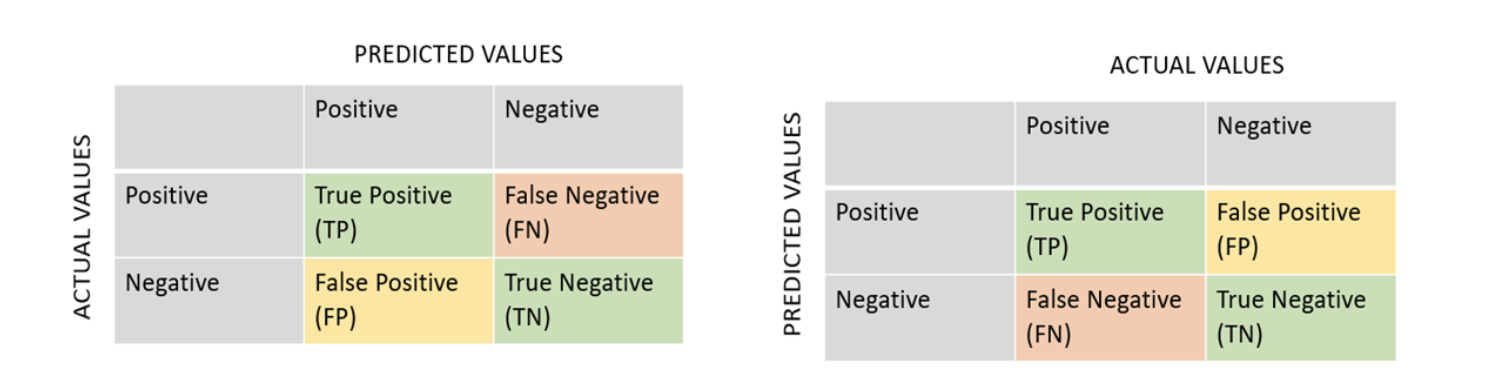


##Accuracy Score

*calculate_accuracy_score(y_predict, y_actual)* returns the accuracy score. \
In terms of the confusion matrix, the accuracy score formula is:

$accuracy = \frac{tp \ + \ tn}{num\_samples}$


##Matthews Correlation Coefficient

*calculate_MCC_score(y_predict, y_actual)* returns the MCC score. In terms of the confusion matrix, the MCC score formula is:

$MCC = \frac{tp \times tn \ - \ fp \times fn}{\sqrt{(tp + fp)(tp + fn)(tn + fp)(tn + fn)}}$

MCC is a correlation coefficient value between -1 and +1: \
+1: Perfect Prediction \
0: Average Random Prediction \
-1: Perfect Inverse Prediction \

MCC is generally regarded as a balanced measure (taking into account all four of True Positives, True Negatives, False Positives, and False Negatives) which can be used even in unbalanced datasets (ratio of 0 and 1 labels far from 50/50). MCC also solves a glaring problem in the simpler accuracy score, especially in unbalanced datasets. Take for example a testing set with 80 0-labels and 20 1-labels, a naive model that predicts all 0s will be able to achieve 80% accuracy score, but only 0 MCC score. \


https://scikit-learn.org/stable/modules/model_evaluation.html#matthews-corrcoef

In [11]:
def generate_confusion_matrix(y_predict, y_actual):
  tp = tn = fp = fn = 0 # True Positive, True Negative, False Positive, False Negative
  tp=np.sum(((y_predict==1) & (y_actual==1)))
  tn=np.sum(((y_predict==0) & (y_actual==0)))
  fp=np.sum(((y_predict==1) & (y_actual==0)))
  fn=np.sum(((y_predict==0) & (y_actual==1)))
  return tp, tn, fp, fn

def plot_confusion_matrix(y_predict, y_actual):
  mat = ConfusionMatrixDisplay.from_predictions(y_actual, y_predict)
  plt.show()

def calculate_accuracy_score(y_predict, y_actual):
  a=generate_confusion_matrix(y_predict,y_actual)
  acc=(a[0]+a[1])/len(y_actual)
  return acc

def calculate_MCC_score(y_predict, y_actual):
  tp,tn,fp,fn=generate_confusion_matrix(y_predict,y_actual)
  if tp==0:
    return 0
  elif tn==0:
    return 1
  mcc=((tp*tn)-(fp*fn))/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)
  return mcc

#D-Fold Cross-Validation
Class attributes of *DFoldCV*: \
*self.X*: The rows and feature columns of the validation dataset with shape (*num_validation_rows*, *num_feature_columns*). \
*self.y*: The rows and label column of the validation dataset with shape (*num_validation_rows*, ). \
*self.k_list*: A Python list of *K* values for *K-Nearest Neighbors Classifer* to validate (find the optimal) with *D-Fold Cross-Validation*. \
*self.d*: The value of *D* for *D-Fold Cross-Validation*. \

##Generate Folds

Given the value of *D*, we can split our validation dataset into *D* splits. For each of the *D* folds, the training set should be comprised of *D - 1* splits, with the testing set comprised of the leftover split. The function *generate_folds(self)* returns the appropriate training and testing sets accordingly.

##Cross-Validate

Calculates and return the validation scores for each value of *K* in *self.k_list* across each of the *D* folds. The expected return value is a Numpy 2D array with shape (*length of self.k_list*, *D*). For the sake of simplicity, we will only validate with the MCC score.



##Validate Best K

Based on the validation scores we have calculated in the cross-validation st4ep, the overall score for each *K* is simply the average MCC score across all *D* folds. Therefore, we can choose and return the value of *K* with the highest overall score.

In [13]:
class DFoldCV:
  def __init__(self, X, y, k_list, d):
    self.X = X
    self.y = y
    self.k_list = k_list
    self.d = d

  def generate_folds(self):
    a=np.concatenate([self.X,self.y[:,None]],axis=1)
    b=np.array_split(a,self.d)
    test_d_folds=[]
    train_d_folds=[]
    for i in range(self.d):
      test_d_folds.append(b[i])
      train_d_folds.append(np.concatenate(b[:i]+b[i+1:]))
    return train_d_folds, test_d_folds

  def cross_validate(self):
    ans=np.zeros((len(self.k_list),self.d))
    for k in range(len(self.k_list)):
      knn_model=KNNClassifier(self.k_list[k])
      train,test=self.generate_folds()#tuple of 2 3d python lists
      for i in range(self.d):
        ctrain=train[i]
        ctest=test[i]
        knn_model.fit(ctrain[:, :-1], ctrain[:, -1])
        b=knn_model.predict(ctest[:, :-1])
        #b=y_predict
        #y_actual should be last row of test_d_folds[i]
        #c=y_actual
        c=ctest[:,-1]
        mcc=calculate_MCC_score(b,c)
        ans[k][i]=mcc
    return ans

  def validate_best_k(self):
    a=self.cross_validate()
    ans=0
    for i in range(len(self.k_list)):
      mcc_score=np.mean(a[i])
      if mcc_score>ans:
        ans=mcc_score
        pos=i
    best_k=self.k_list[pos]
    return best_k

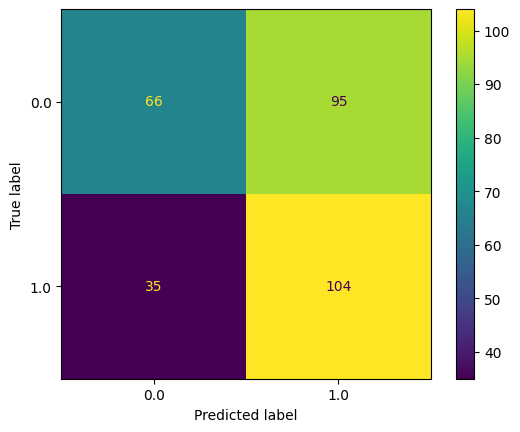

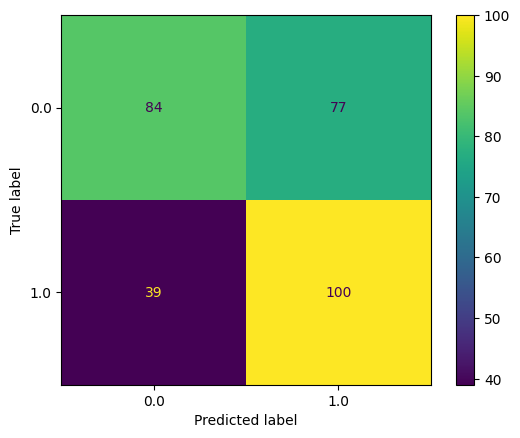

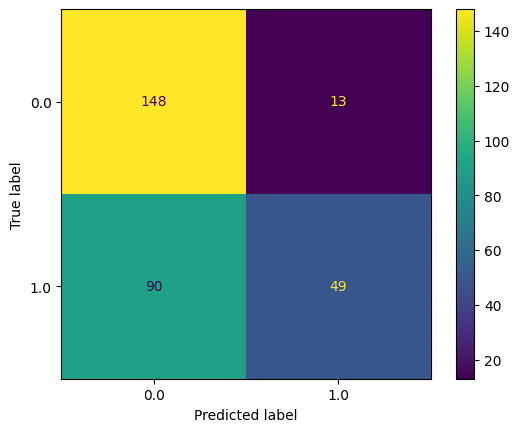

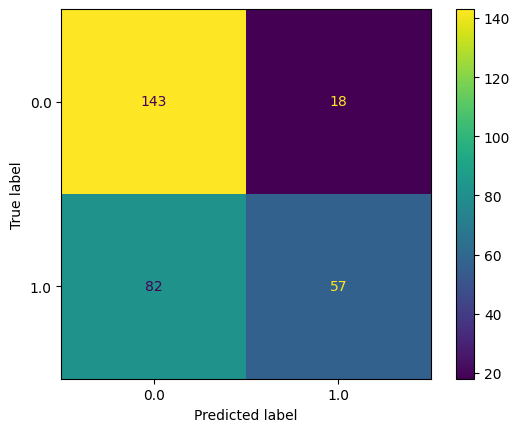

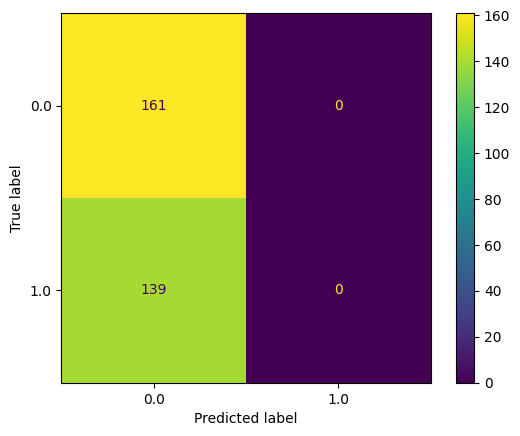

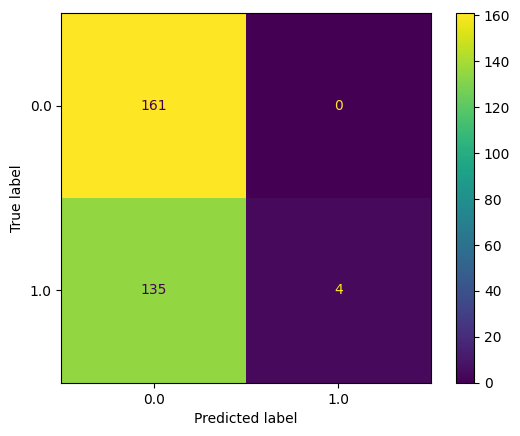

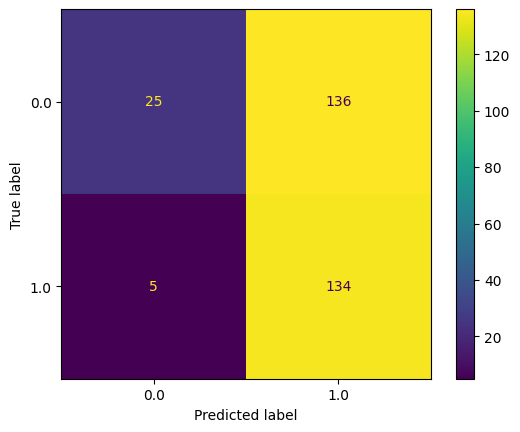

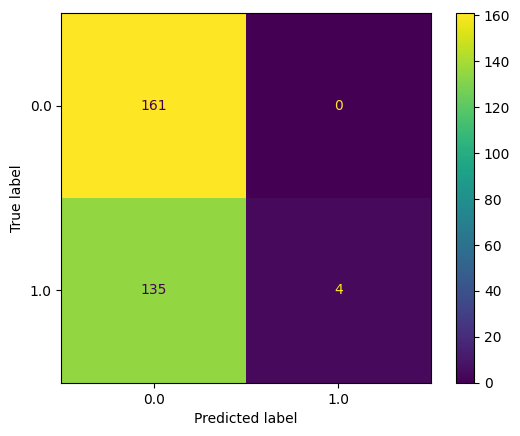

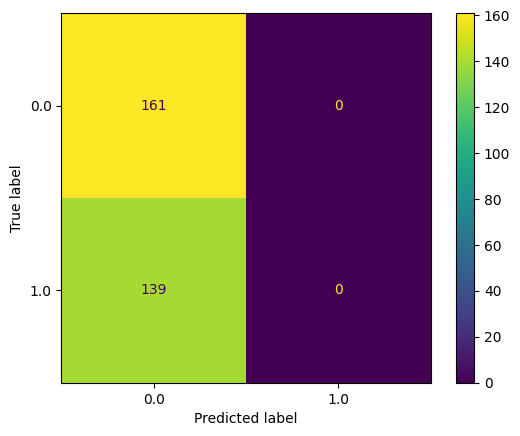

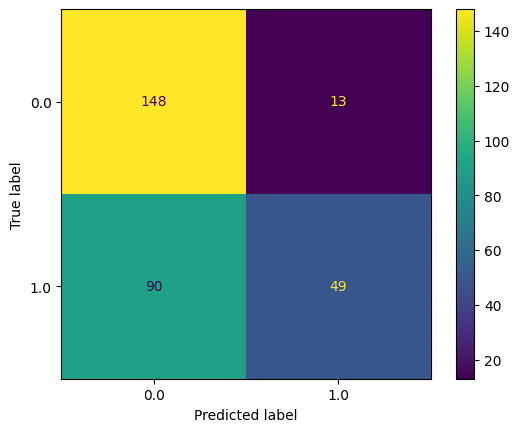

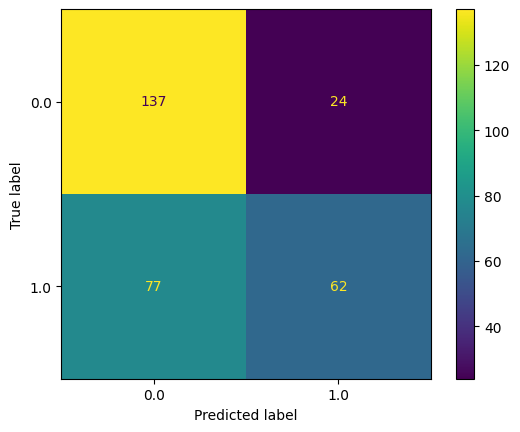

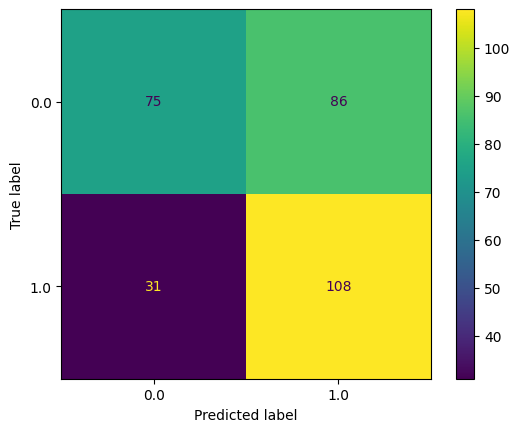

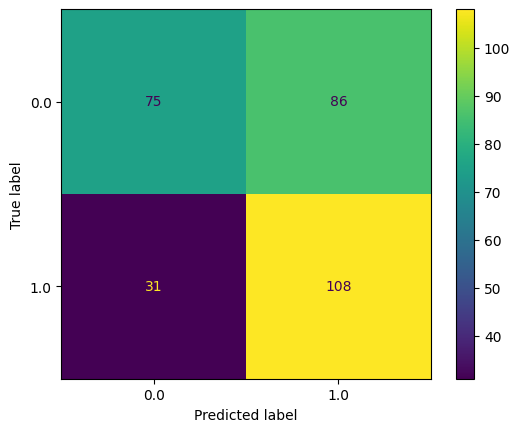

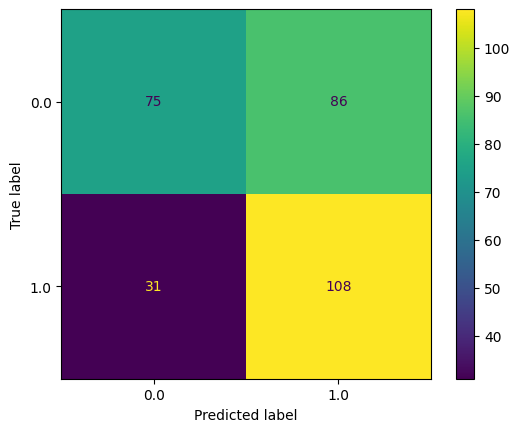

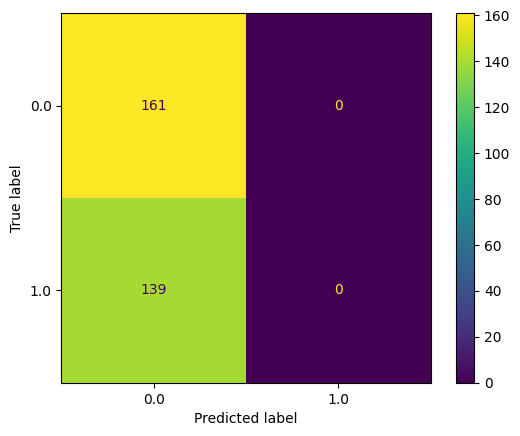

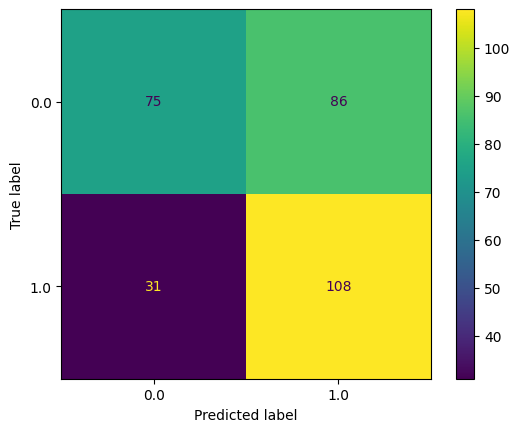

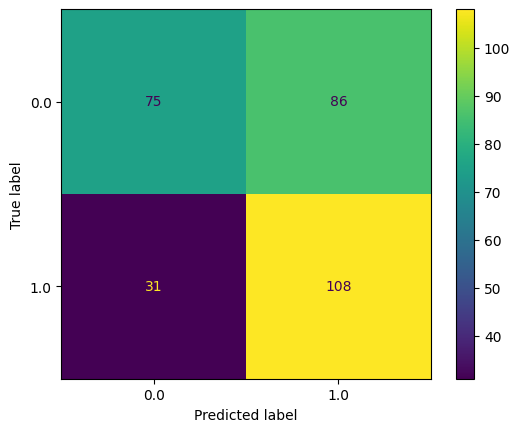

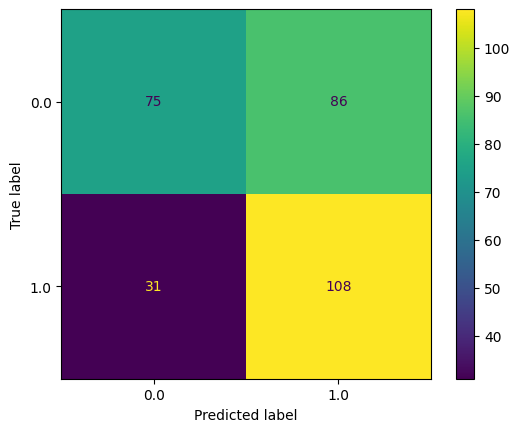

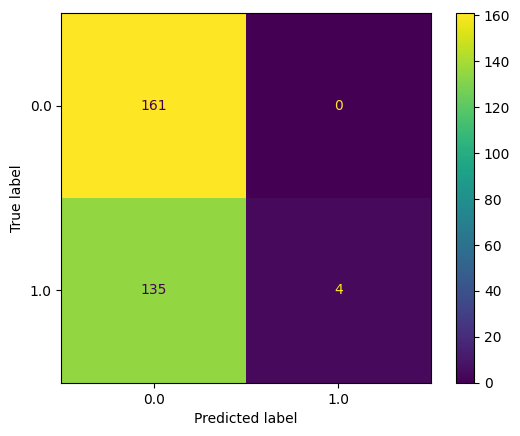

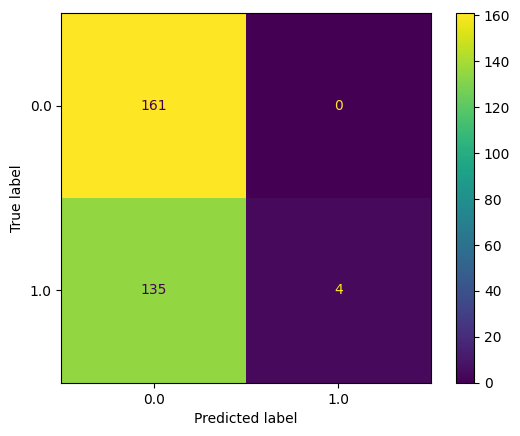

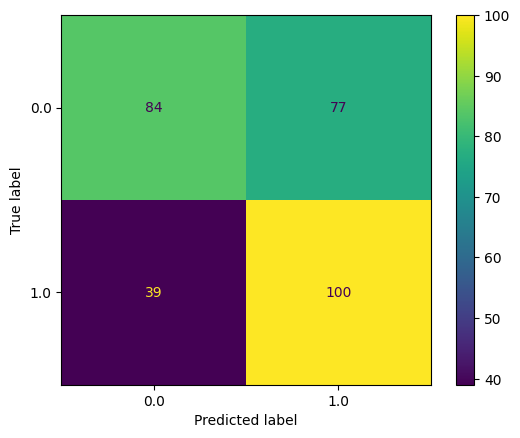

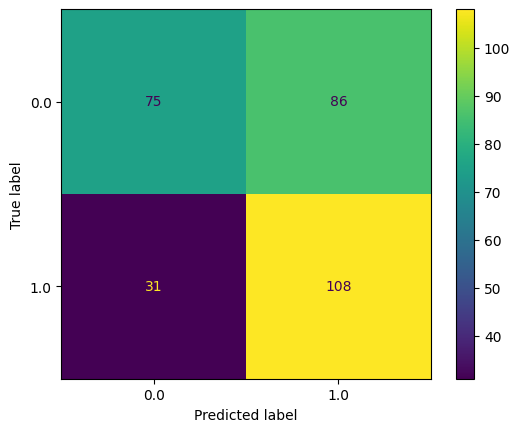

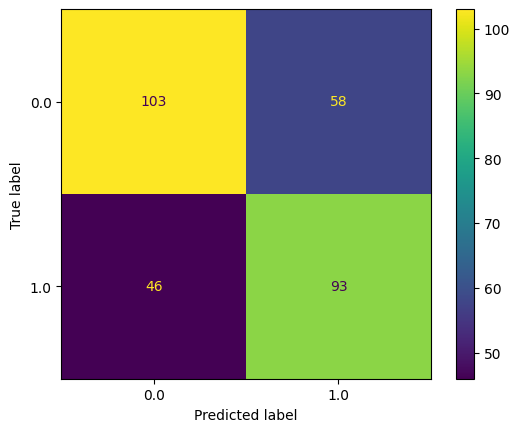

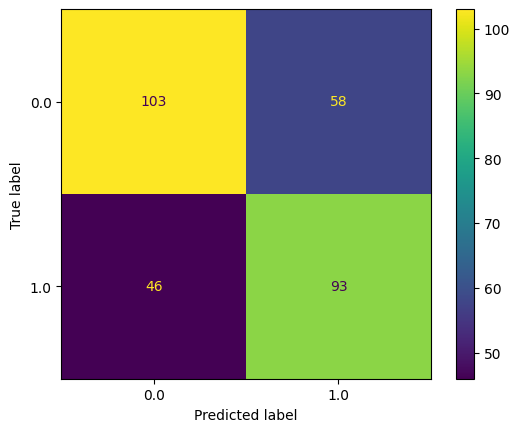

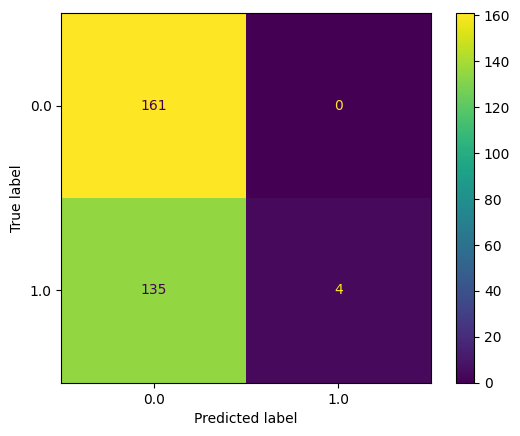

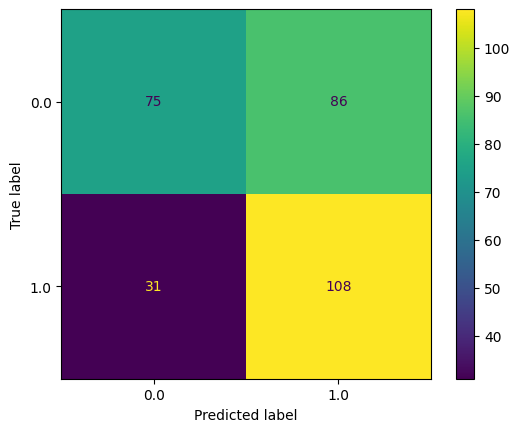

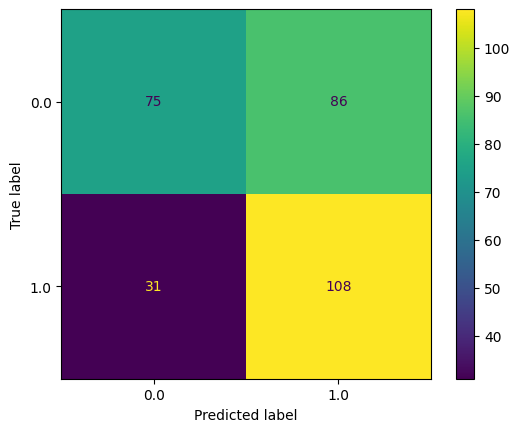

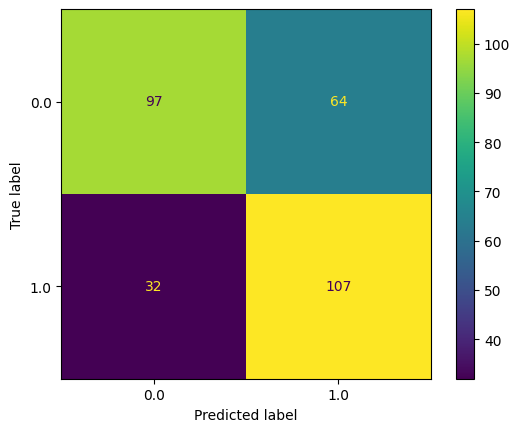

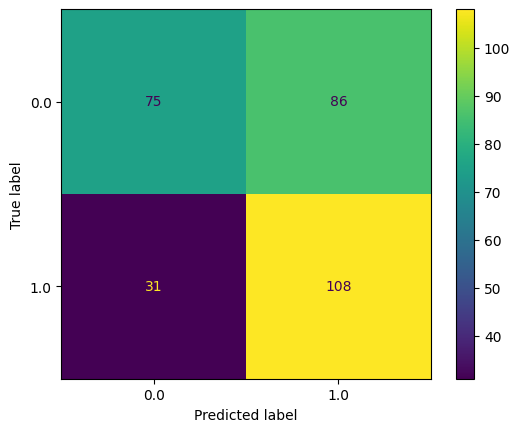

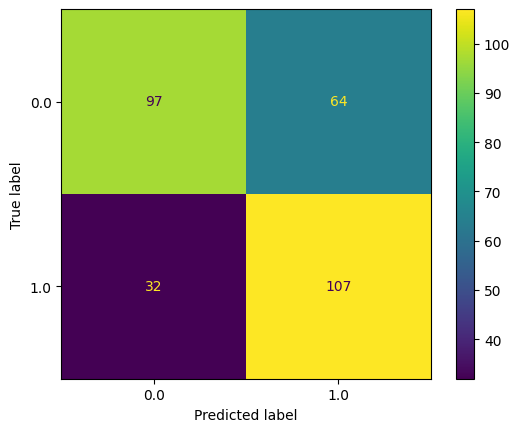

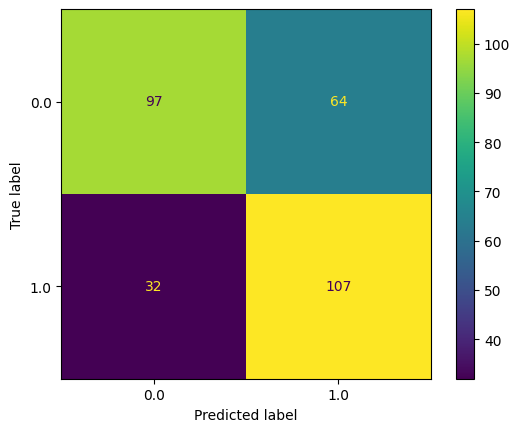

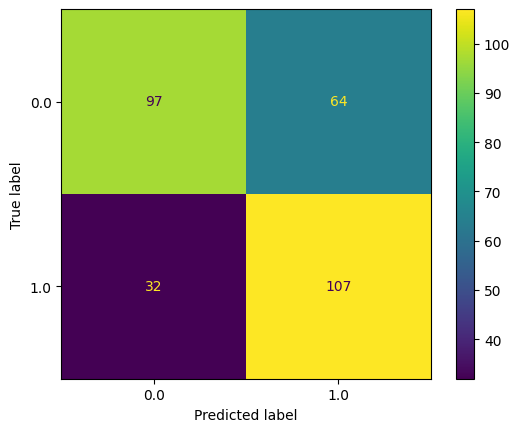

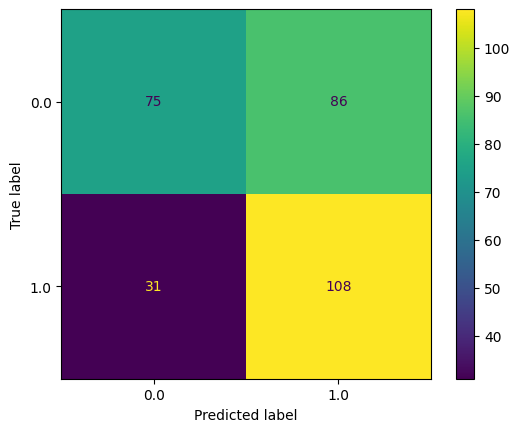

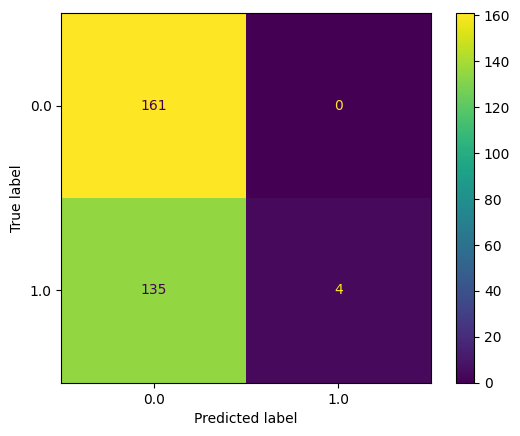

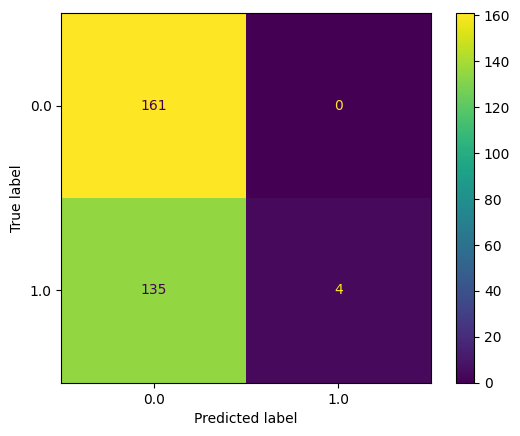

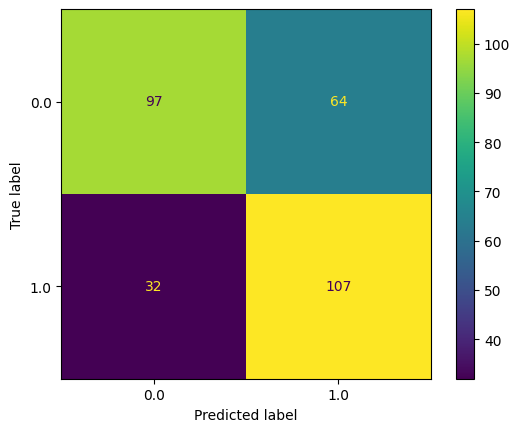

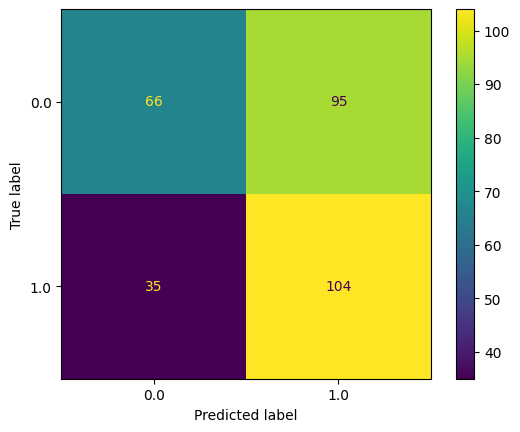

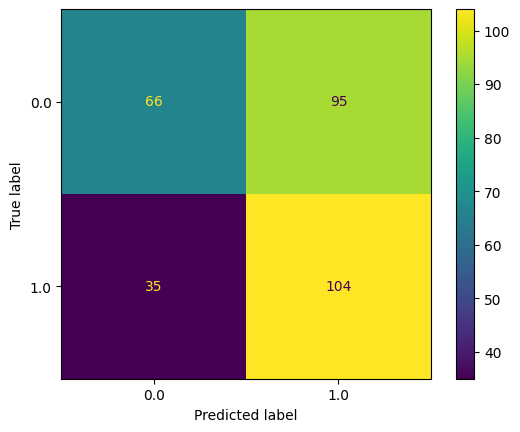

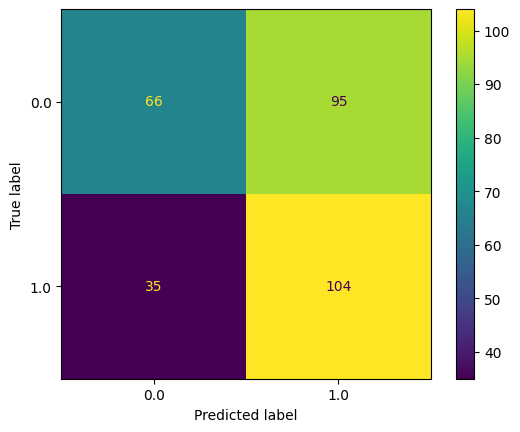

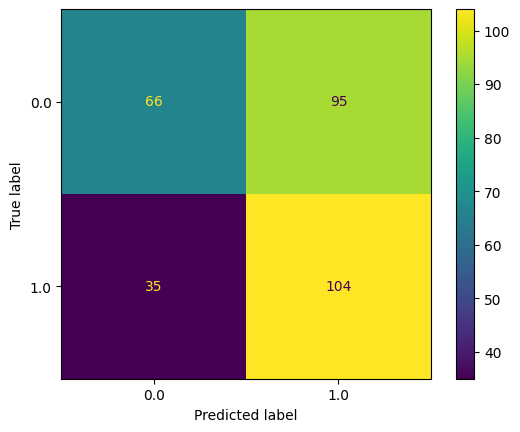

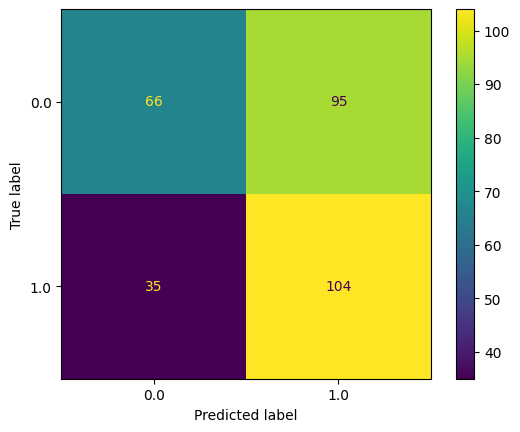

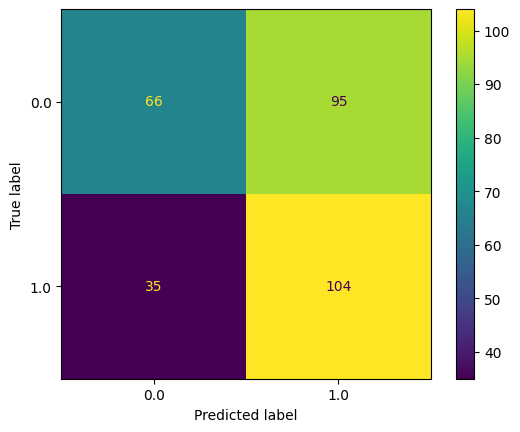

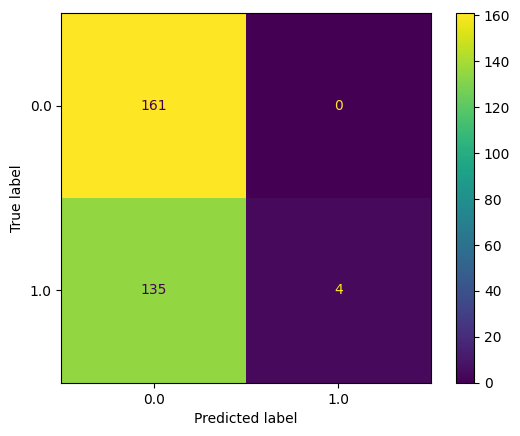

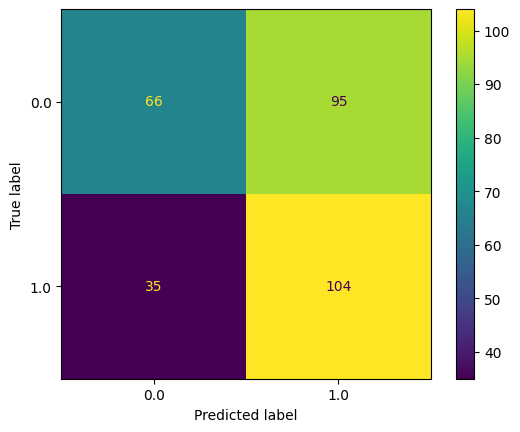

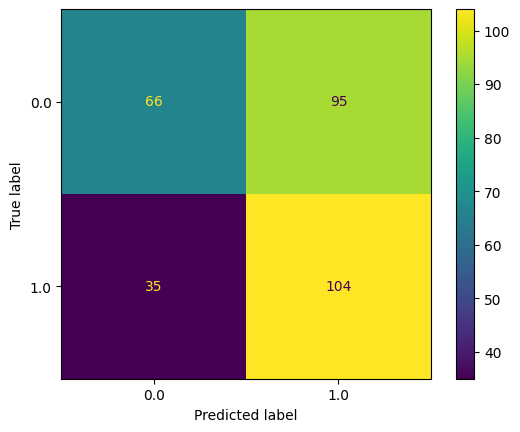

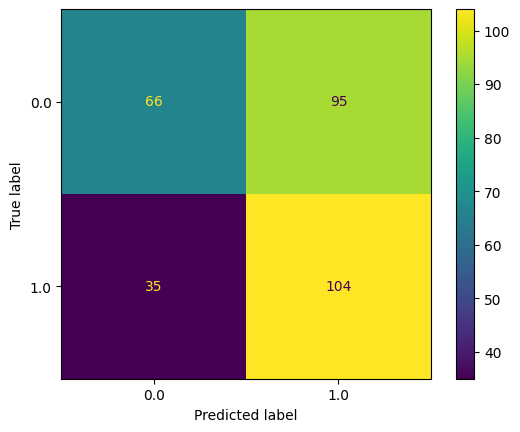

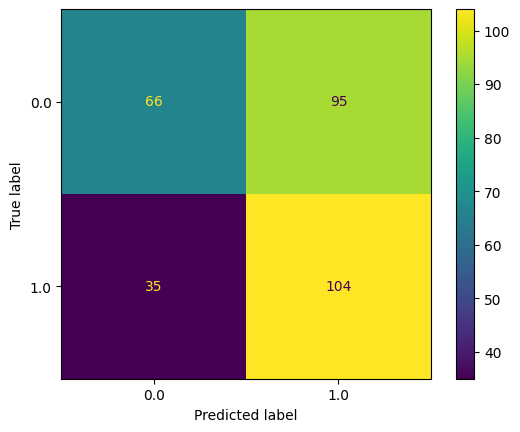

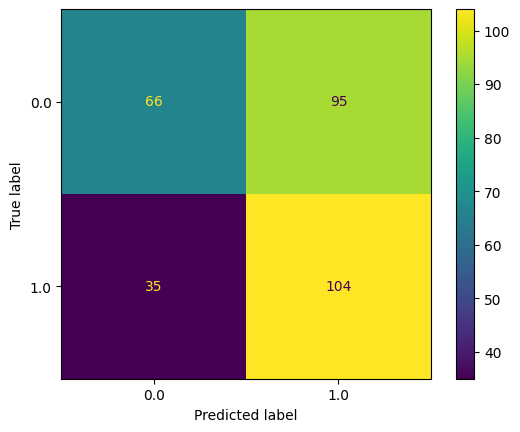

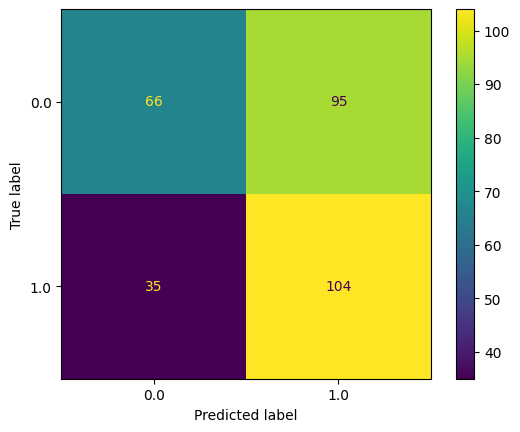

In [17]:
if __name__ == '__main__':
  train = np.loadtxt("heart_disease_train_dataset.csv", delimiter=',', skiprows=1)
  test = np.loadtxt("heart_disease_test_dataset.csv", delimiter=',', skiprows=1)

  X_train, y_train = train[:, :-1], train[:, -1]
  X_test, y_test = test[:, :-1], test[:, -1]
  k_list=list(range(1,202,2))
  d_list=list(range(2,51))
  X_train=standardize_dataset(X_train)

  #Here we find out the most optimal value for k for the KNN voting based on the number of folds we use in cross-validation
  for d in d_list:
      obj=DFoldCV(X_train,y_train,k_list,d)
      v=obj.validate_best_k()
      classifier = KNNClassifier(v)
      classifier.fit(X_train, y_train)
      y_predict = classifier.predict(X_test)
      plot_confusion_matrix(y_predict, y_test)
  #TODO Optional